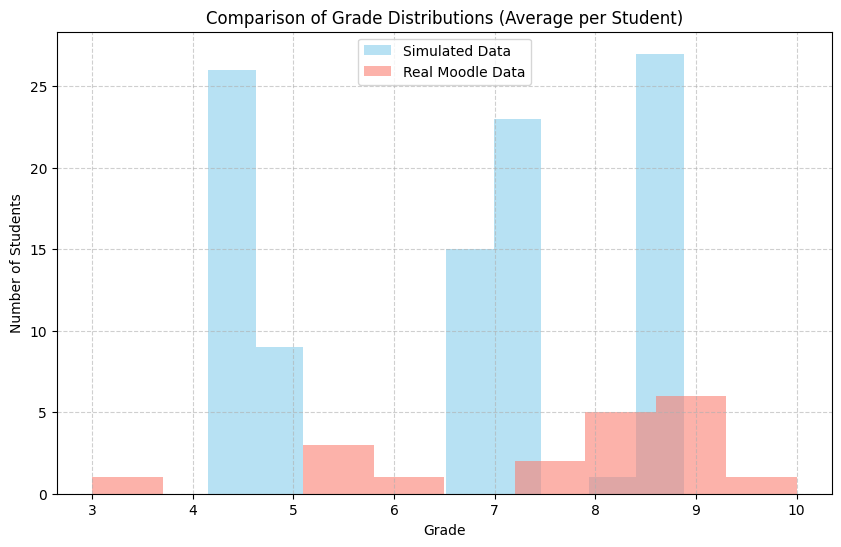

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_42854/4272576487.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


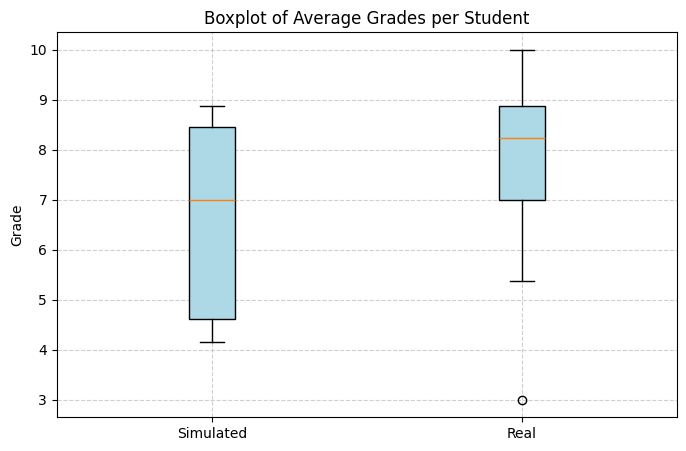

📊 Thống kê mô tả:
Simulated Data:
 count    101.000000
mean       6.615329
std        1.654107
min        4.155172
25%        4.624138
50%        6.989655
75%        8.462069
max        8.879310
Name: grade, dtype: float64 

Real Data:
 count    19.000000
mean      7.698452
std       1.756363
min       3.000000
25%       7.000000
50%       8.235294
75%       8.882353
max      10.000000
Name: grade, dtype: float64
Số sinh viên (Simulated): 101
Số sinh viên (Real): 19


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1️⃣ Đọc dữ liệu ===
df_sim = pd.read_csv("../data/simulate_grade_with_score.csv")
df_real = pd.read_csv("../data_origin/udk_moodle_grades_course_670.csv")

# === 2️⃣ Chuẩn hóa tên cột ===
df_sim = df_sim.rename(columns={"finalgrade": "grade", "user_id": "userid"})
df_real = df_real.rename(columns={"finalgrade": "grade"})

# === 3️⃣ Lọc bỏ giá trị không hợp lệ ===
df_real = df_real[df_real["grade"] >= 0]
df_sim = df_sim[df_sim["grade"] >= 0]

# === 4️⃣ Gom nhóm để lấy điểm trung bình mỗi sinh viên ===
df_real_student = df_real.groupby("userid")["grade"].mean().reset_index()
df_sim_student = df_sim.groupby("userid")["grade"].mean().reset_index()

# === 5️⃣ Vẽ biểu đồ Histogram ===
plt.figure(figsize=(10, 6))
plt.hist(df_sim_student["grade"], bins=10, alpha=0.6, color="skyblue", label="Simulated Data")
plt.hist(df_real_student["grade"], bins=10, alpha=0.6, color="salmon", label="Real Moodle Data")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.title("Comparison of Grade Distributions (Average per Student)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# === 6️⃣ Vẽ biểu đồ Boxplot ===
plt.figure(figsize=(8, 5))
plt.boxplot(
    [df_sim_student["grade"], df_real_student["grade"]],
    labels=["Simulated", "Real"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue"),
)
plt.ylabel("Grade")
plt.title("Boxplot of Average Grades per Student")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# === 7️⃣ In thống kê mô tả ===
print("📊 Thống kê mô tả:")
print("Simulated Data:\n", df_sim_student["grade"].describe(), "\n")
print("Real Data:\n", df_real_student["grade"].describe())

# === 8️⃣ (Tuỳ chọn) In số lượng sinh viên ===
print(f"Số sinh viên (Simulated): {df_sim_student['userid'].nunique()}")
print(f"Số sinh viên (Real): {df_real_student['userid'].nunique()}")

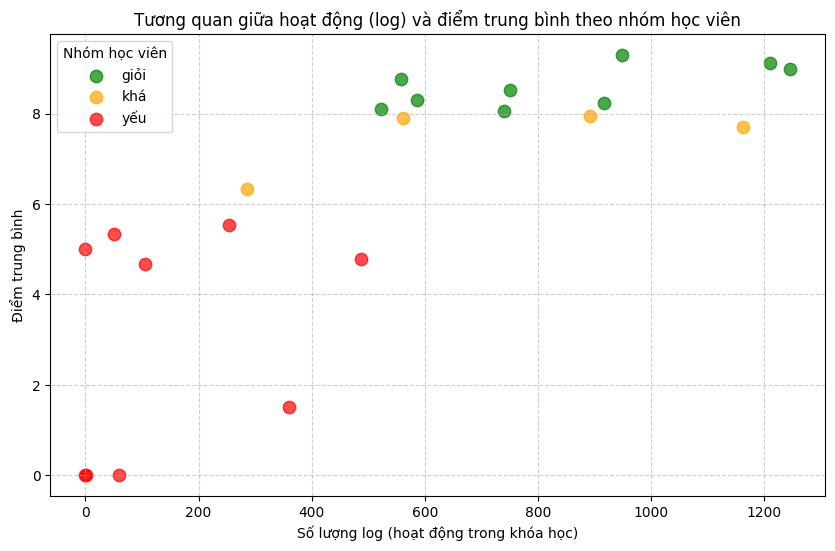

<Figure size 800x500 with 0 Axes>

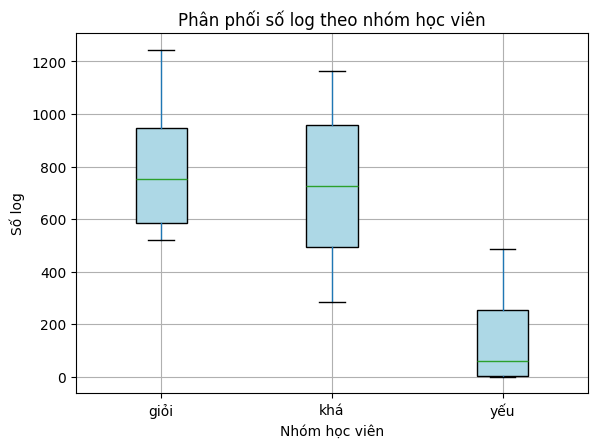

📊 Thống kê trung bình số log và điểm theo nhóm:
         log_count  avg_grade
cluster                      
giỏi        830.67       8.60
khá         725.75       7.47
yếu         146.33       2.98


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === Bước 1: Đọc dữ liệu ===
logs = pd.read_csv("../data_origin/udk_moodle_log_course_670.csv")
scores = pd.read_csv("../data/output/user_avg_and_cluster.csv")

# --- Ép kiểu userid cho chắc chắn ---
logs["userid"] = logs["userid"].astype(str)
scores["userid"] = scores["userid"].astype(str)

# === Bước 2: Đếm số lượng log theo từng user ===
log_count = logs.groupby("userid", as_index=False).size()
log_count = log_count.rename(columns={"size": "log_count"})

# === Bước 3: Merge với dữ liệu điểm và nhóm ===
merged = pd.merge(scores, log_count, on="userid", how="left")
merged["log_count"] = merged["log_count"].fillna(0)

# === Bước 4: Vẽ biểu đồ Scatter ===
plt.figure(figsize=(10, 6))
colors = {"giỏi": "green", "khá": "orange", "yếu": "red"}

for cluster, group_data in merged.groupby("cluster"):
    plt.scatter(group_data["log_count"], group_data["avg_grade"],
                label=cluster, alpha=0.7, s=80, c=colors.get(cluster, "gray"))

plt.xlabel("Số lượng log (hoạt động trong khóa học)")
plt.ylabel("Điểm trung bình")
plt.title("Tương quan giữa hoạt động (log) và điểm trung bình theo nhóm học viên")
plt.legend(title="Nhóm học viên")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# === Bước 5: Boxplot (số log theo nhóm) ===
plt.figure(figsize=(8, 5))
merged.boxplot(column="log_count", by="cluster", grid=True,
               patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Phân phối số log theo nhóm học viên")
plt.suptitle("")
plt.xlabel("Nhóm học viên")
plt.ylabel("Số log")
plt.show()

# === Thống kê mô tả ===
print("📊 Thống kê trung bình số log và điểm theo nhóm:")
print(merged.groupby("cluster")[["log_count", "avg_grade"]].mean().round(2))

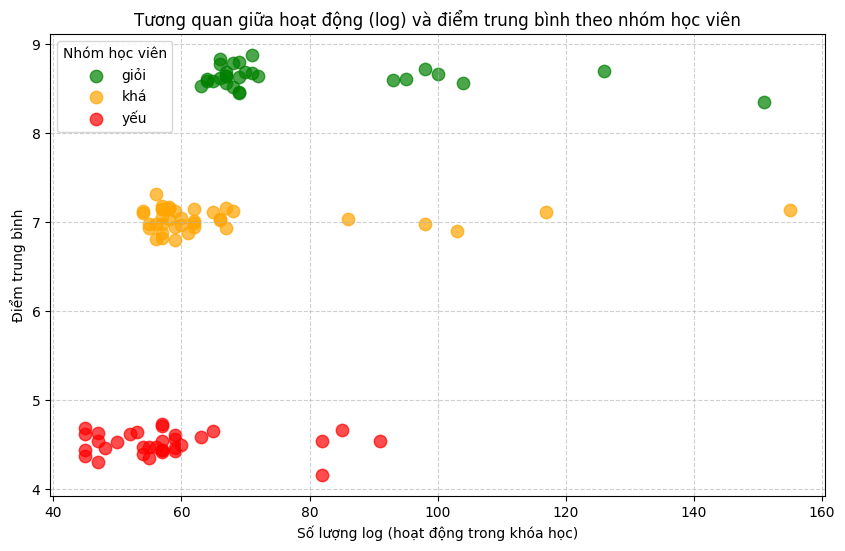

<Figure size 800x500 with 0 Axes>

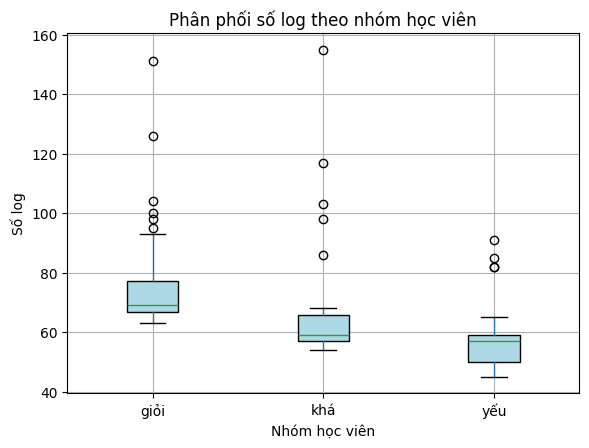

📊 Thống kê trung bình số log và điểm theo nhóm:
         log_count  avg_grade
cluster                      
giỏi         78.04       8.64
khá          66.39       7.03
yếu          57.70       4.51


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# === Bước 1: Đọc dữ liệu ===
logs = pd.read_csv("../data/simulate_log.csv")
scores = pd.read_csv("../data/output/user_avg_and_cluster_simulate.csv")

# --- Ép kiểu userid cho chắc chắn ---
logs["userid"] = logs["userid"].astype(str)
scores["userid"] = scores["userid"].astype(str)

# === Bước 2: Đếm số lượng log theo từng user ===
log_count = logs.groupby("userid", as_index=False).size()
log_count = log_count.rename(columns={"size": "log_count"})

# === Bước 3: Merge với dữ liệu điểm và nhóm ===
merged = pd.merge(scores, log_count, on="userid", how="left")
merged["log_count"] = merged["log_count"].fillna(0)

# === Bước 4: Vẽ biểu đồ Scatter ===
plt.figure(figsize=(10, 6))
colors = {"giỏi": "green", "khá": "orange", "yếu": "red"}

for cluster, group_data in merged.groupby("cluster"):
    plt.scatter(group_data["log_count"], group_data["avg_grade"],
                label=cluster, alpha=0.7, s=80, c=colors.get(cluster, "gray"))

plt.xlabel("Số lượng log (hoạt động trong khóa học)")
plt.ylabel("Điểm trung bình")
plt.title("Tương quan giữa hoạt động (log) và điểm trung bình theo nhóm học viên")
plt.legend(title="Nhóm học viên")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# === Bước 5: Boxplot (số log theo nhóm) ===
plt.figure(figsize=(8, 5))
merged.boxplot(column="log_count", by="cluster", grid=True,
               patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Phân phối số log theo nhóm học viên")
plt.suptitle("")
plt.xlabel("Nhóm học viên")
plt.ylabel("Số log")
plt.show()

# === Thống kê mô tả ===
print("📊 Thống kê trung bình số log và điểm theo nhóm:")
print(merged.groupby("cluster")[["log_count", "avg_grade"]].mean().round(2))